In [ ]:
# Artificial Intelligence Lab Assignment 6
# Feedforward Neural Network for MNIST Dataset

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report  # will give us a nicely formatted report displaying the total accuracy of our model, for each digit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
# load MNIST dataset
print("Accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()        

# flatten each image from 3D to 2D 
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))       
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

Accessing MNIST...


In [ ]:
# convert the labels from integers to vectors i.e., 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()           # layers will be stacked on top of each other with the output of the previous layer feeding into the next.
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=20, batch_size=128)

[INFO] training network...
Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 2.2847 - accuracy: 0.1805 - val_loss: 2.2458 - val_accuracy: 0.3432
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 2.2138 - accuracy: 0.3768 - val_loss: 2.1744 - val_accuracy: 0.4434
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 2.1318 - accuracy: 0.4801 - val_loss: 2.0752 - val_accuracy: 0.5332
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 2.0143 - accuracy: 0.5513 - val_loss: 1.9325 - val_accuracy: 0.5703
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 1.8503 - accuracy: 0.5948 - val_loss: 1.7430 - val_accuracy: 0.5854
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 1.6486 - accuracy: 0.6381 - val_loss: 1.5280 - val_accuracy: 0.6600
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 1.4391 - accuracy: 0.6857 - val_loss: 1.3235 - 

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.92      0.98      0.95      1135
           2       0.89      0.84      0.86      1032
           3       0.82      0.87      0.85      1010
           4       0.83      0.90      0.86       982
           5       0.82      0.75      0.78       892
           6       0.89      0.91      0.90       958
           7       0.89      0.89      0.89      1028
           8       0.88      0.78      0.83       974
           9       0.85      0.80      0.82      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



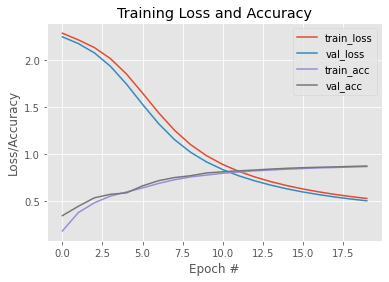

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()